# 1- Data prepration

In [1]:
from seaborn import load_dataset
import pandas as pd

data = load_dataset('Diamonds')

In [2]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
X = data.drop('price', axis = 1)
y = data['price']

In [4]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [6]:
X.describe()

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [7]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [8]:
X['cut'].unique() #map

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
X['color'].unique() #one_hot_vector

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
X['clarity'].unique() #map

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [11]:
X['cut'] = X['cut'].map({'Ideal':4, 'Premium':3, 'Good':1, 'Very Good':2, 'Fair':0}).astype(int)

In [12]:
X['clarity'] = X['clarity'].map({'SI2':1, 'SI1':2, 'VS1':4, 'VS2':3, 'VVS2':5, 'VVS1':6, 'I1':0, 'IF':7}).astype(int)

In [13]:
cols = pd.get_dummies(X['color'])
X[cols.columns] = cols
X.drop('color', inplace=True, axis = 1)

In [14]:
X.head()

,carat,cut,clarity,depth,table,x,y,z,D,E,F,G,H,I,J
0,0.23,4,1,61.5,55.0,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,3,62.4,58.0,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,1,63.3,58.0,4.34,4.35,2.75,0,0,0,0,0,0,1


In [15]:
y[:5]

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

# ML models

1. Linear regression 
2. KNN regrssor - best param
3. SGDRegressor - best params
4. Ridge - best param
5. Lasso - feature importance, best param
6. LinearSVR - best param
7. SVR kernel = 'rbf' and 'poly' - best params
8. Decision Tree Regressor - best params

## Data preprocessing

In [16]:
X.shape

(53940, 15)

In [17]:
# split dataset
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [18]:
#scale dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train_org)
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

c:\users\nxs045000\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\nxs045000\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  import sys
c:\users\nxs045000\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  


In [19]:
f = open('diamond_BUAN002.csv', 'w')
line  = 'Model_name,Model_params,Train_score,Test_score\n'
f.write(line)
f.close()

## 1. Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

print('Train score: %.4f'%lreg.score(X_train, y_train))
print('Test score: %.4f'%lreg.score(X_test, y_test))

Train score: 0.9091
Test score: 0.9103


In [21]:
line = 'LinearRegression, ,' + str(lreg.score(X_train, y_train)) + ',' + str(lreg.score(X_test, y_test)) + '\n'
f = open('diamond_BUAN002.csv','a')
f.write(line)
f.close()

##### Plot - based on only one feature in the X

## 2- KNN Regressor 

In [22]:
from sklearn.neighbors import KNeighborsRegressor
train = []
test = []

for k in [1, 3, 5, 7, 9]:
    #create the model
    knn = KNeighborsRegressor(n_neighbors= k)
    # train the model on the train set
    knn.fit(X_train, y_train)
    train.append(knn.score(X_train, y_train))
    test.append(knn.score(X_test, y_test))

Text(0.5, 0, 'n_neighbors')

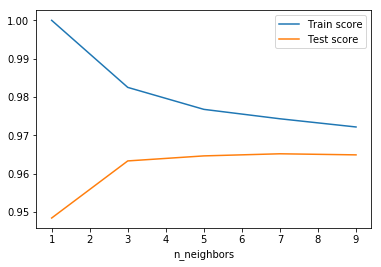

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot([1, 3, 5, 7, 9], train, label = 'Train score')
plt.plot([1, 3, 5, 7, 9], test, label = 'Test score')
plt.legend()
plt.xlabel('n_neighbors')

The best parameter is ``n_neighbors = 5``. 

In [24]:
f = open('diamond_BUAN002.csv', 'a')
line = 'KNeighborsRegressor, n_neighbors = 5, ' + str(train[2]) + ',' + str(test[2]) + '\n'
f.write(line)
f.close()

## 3- SGDRegressor

- ``max_iter in [1000, 5000, 10000]``
- ``penalty in ['l1', 'l2']``

In [25]:
from sklearn.linear_model import SGDRegressor

train_l1 = []
test_l1 = []
train_l2 = []
test_l2 = []

for max_iter in [1000, 5000, 10000]:
    #create the model
    sgd_l1 = SGDRegressor(max_iter = max_iter, penalty= 'l1')
    sgd_l2 = SGDRegressor(max_iter = max_iter, penalty= 'l2')
    
    #train the model
    sgd_l1.fit(X_train, y_train)
    sgd_l2.fit(X_train, y_train)
    
    #evaluation
    train_l1.append(sgd_l1.score(X_train, y_train))
    test_l1.append(sgd_l1.score(X_test, y_test))
    train_l2.append(sgd_l2.score(X_train, y_train))
    test_l2.append(sgd_l2.score(X_test, y_test))

c:\users\nxs045000\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
c:\users\nxs045000\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
c:\users\nxs045000\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sto

KeyboardInterrupt: 

In [ ]:
% matplotlib inline

plt.plot([1000, 5000, 10000], train_l1 , label = 'Train score - l1')
plt.plot([1000, 5000, 10000], test_l1 , label = 'Test score - l1')
plt.plot([1000, 5000, 10000], train_l2 , label = 'Train score - l2')
plt.plot([1000, 5000, 10000], test_l2 , label = 'Test score - l2')

plt.legend()
plt.xlabel('max_iter')

Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

#base model
sgd = SGDRegressor(random_state = 0)

#grid params
grid_param = {'penalty': ['l1', 'l2'], 
             'max_iter':[1000, 5000, 10000]}

#build the grid earch model
sgd_grid = GridSearchCV(sgd, grid_param, cv = 7, return_train_score = True, n_jobs= -1)

#train the model
sgd_grid.fit(X_train, y_train)

In [ ]:
sgd_grid.best_params_

In [ ]:
sgd_grid.best_score_

In [ ]:
sgd_grid.cv_results_ 

In [ ]:
f = open('diamond_BUAN002.csv', 'a')
line = 'SGDRegressor, penalty = l1 - max_iter = 5000, ' + str(train_l1[1]) + ',' + str(test_l1[1]) + '\n'
f.write(line)
f.close()

## 4- Ridge

In [ ]:
from sklearn.linear_model import Ridge

train = []
test= []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    #create the model 
    ridge = Ridge(alpha = alpha)
    
    #train the model
    ridge.fit(X_train, y_train)
    
    #evalutation
    train.append(ridge.score(X_train,y_train))
    test.append(ridge.score(X_test, y_test))

In [ ]:
%matplotlib inline

plt.plot([0.01, 0.1, 1, 10, 100], train, label = 'Train score')
plt.plot([0.01, 0.1, 1, 10, 100], test, label = 'Test score')

plt.legend()
plt.xlabel('Alpha')

In [ ]:
f = open('diamond_BUAN002.csv', 'a')
line = 'Ridge, alpha = 0.01, ' + str(train[0]) + ',' + str(test[0]) + '\n'
f.write(line)
f.close()

In [ ]:
result = pd.read_csv('diamond_BUAN002.csv')

In [ ]:
result

## 5-DecisionTreeRegressor()
use grid search to find the best parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#base model
tree = DecisionTreeRegressor(random_state = 0)

#model params
grid_param = {'max_depth':[1, 2, 3, 5, 9, 15]}

#build the grid search model
tree_grid = GridSearchCV(tree, grid_param, cv = 5, return_train_score = True, n_jobs = -1)

#train the model
tree_grid.fit(X_train, y_train)

#get the results 
print('Best score:', tree_gird.best_score_)
print('Best param:', tree_grid.best_params_)

## 6-Bagging Regressor with Decision Tree Regressor

In [ ]:
from sklearn.ensmble import BaggingRegressor

#base model
tree = DecisionTreeRegressor(random_state = 0)

#Build the bagging regressor model
bag_reg = BaggingRegressor(tree, n_estimators = 100, max_samples = 500, 
                           max_features = 5, bootstrap = True, oob_score = True)

#train the model
bag_reg.fit(X, y)

#model attributes
print(bag_reg.oob_score_)
print(bag_reg.score(X,y))

# simple neural network model

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
X_train.shape

(40455, 15)

In [43]:
#step 1: build the model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 15, activation = 'sigmoid'))
#hidden layer
#output layer: no activation function
model1.add(Dense(1))

#step 2: compile the model
model1.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])

#step 3: train the model
model1.fit(X_train,y_train, epochs = 20, batch_size = 256)

#step 4: model evaluation

Epoch 1/50
40455/40455 [==============================] - 0s 4us/sample - loss: 13944917.9714 - mse: 13944919.0000
Epoch 2/50
40455/40455 [==============================] - 0s 3us/sample - loss: 5083658.8982 - mse: 5083659.0000
Epoch 3/50
40455/40455 [==============================] - 0s 3us/sample - loss: 3038740.9304 - mse: 3038740.5000
Epoch 4/50
40455/40455 [==============================] - 0s 3us/sample - loss: 2173458.3077 - mse: 2173458.5000
Epoch 5/50
40455/40455 [==============================] - 0s 3us/sample - loss: 2305947.2117 - mse: 2305947.7500
Epoch 6/50
40455/40455 [==============================] - 0s 3us/sample - loss: 1745956.6223 - mse: 1745956.5000
Epoch 7/50
40455/40455 [==============================] - 0s 3us/sample - loss: 1577052.6953 - mse: 1577052.2500
Epoch 8/50
40455/40455 [==============================] - 0s 3us/sample - loss: 1417054.7443 - mse: 1417054.0000
Epoch 9/50
40455/40455 [==============================] - 0s 3us/sample - loss: 1354056.5941 -

In [44]:
model1.evaluate(X_train, y_train)

40455/40455 [==============================] - 0s 12us/sample - loss: 934281.6544 - mse: 934282.3750


[934281.6543918398, 934282.4]

In [45]:
model1.evaluate(X_test, y_test)

13485/13485 [==============================] - 0s 11us/sample - loss: 945625.9098 - mse: 945626.0000


[945625.9097677976, 945626.0]

In [46]:
from sklearn.metrics import r2_score
y_pred = model1.predict(X_train)

In [47]:
y_train_pred =  y_train_pred.reshape(-1,1)
r2_score(y_train, y_train_pred)

0.9387692172698264

In [48]:
r2_score(y_test, model1.predict(X_test))

0.9407928014414323